<a href="https://colab.research.google.com/github/DrViktoria/DZ/blob/master/MMO_LR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

1.   Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2.   Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:


*   обработку пропусков в данных;
*   кодирование категориальных признаков;
*  масштабирование данных.



---



# Импорт библиотек

In [0]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# os.listdir('/content/drive/My Drive/Colab Notebooks/')

# Будем анализировать данные только на обучающей выборке
# data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/StudentsPerformance.csv', sep=",")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
os.listdir('/content/drive/My Drive/Colab Notebooks/data sets')

['data.csv',
 'indian_liver_patient.csv',
 'athlete_events.csv',
 'athlete_events3.csv',
 'StudentsPerformance.csv',
 'adult.data.csv',
 'android_devices.csv',
 'user_usage.csv',
 'user_device.csv',
 'restaurant-scores-lives-standard.csv',
 'athlete_events_v1.csv']

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data sets/athlete_events_v1.csv', sep=",")

# Основные характеристики датасета


In [15]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Обработка пропусков данных

In [17]:
# Проверим наличие пустых значений
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [56]:
total_count = data.shape[0]
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age. Тип данных float64. Количество пустых значений 9474, 3.49%.
Колонка Height. Тип данных float64. Количество пустых значений 60171, 22.19%.
Колонка Weight. Тип данных float64. Количество пустых значений 62875, 23.19%.


In [87]:
data_num = data[num_cols]
data_num.head(5)

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,NaN,NaN
3,34.0,NaN,NaN
4,21.0,185.0,82.0


In [85]:
# Фильтр по пустым значениям поля Height
data.head(50)[data['Height'].isnull()]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
39,15,Arvo Ossian Aaltonen,M,34.0,NaN,NaN,Finland,FIN,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN


In [71]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Height'].isnull()].index
flt_index


Int64Index([     2,      3,     29,     35,     36,     37,     38,     39,
                58,     83,
            ...
            271005, 271010, 271030, 271031, 271034, 271038, 271042, 271043,
            271075, 271100],
           dtype='int64', length=60171)

In [79]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN


In [78]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Height'].head()

2    NaN
3    NaN
29   NaN
35   NaN
36   NaN
Name: Height, dtype: float64

In [91]:
data_num_Height = data_num[['Height']]
data_num_Height.fillna(0).head(5)

,Height
0,180.0
1,170.0
2,0.0
3,0.0
4,185.0


## Обработка пропусков в категориальных данных

In [36]:

# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Medal. Тип данных object. Количество пустых значений 231333, 85.33%.


In [38]:
cat_temp_data = data[['Medal']]
cat_temp_data['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [93]:
imp_const = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No')
data_imp3 = imp_const.fit_transform(cat_temp_data)
data_imp3

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

In [41]:
np.unique(data_imp3)

array(['Bronze', 'Gold', 'No', 'Silver'], dtype=object)

# Преобразование категориальных признаков в числовые

In [47]:
cat_data_gender = data[['Sex']]
cat_data_gender['Sex'].unique()

array(['M', 'F'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
encod_gender= labelencoder.fit_transform(cat_data_gender['Sex'])

In [50]:
np.unique(encod_gender)

array([0, 1])

# Масштабирование данных

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [53]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Year']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


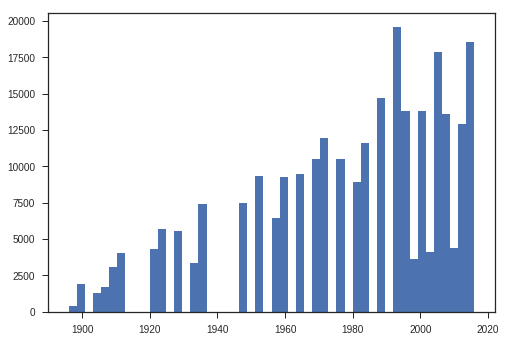

In [54]:
plt.hist(data['Year'], 50)
plt.show()

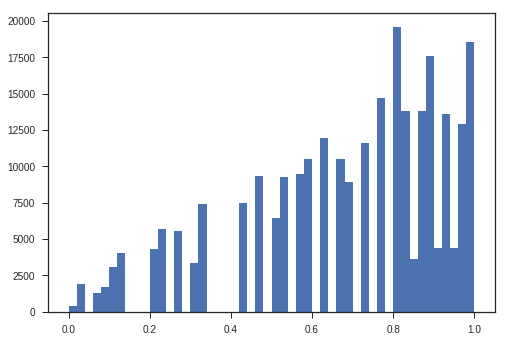

In [55]:
plt.hist(sc1_data, 50)
plt.show()


In [95]:
!jupyter nbconvert —to html "/content/drive/My Drive/Colab Notebooks/MMO-LR3.ipynb"

[NbConvertApp] WARNING | pattern u'\u2014to' matched no files
[NbConvertApp] WARNING | pattern u'html' matched no files
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/MMO-LR3.ipynb to html
[NbConvertApp] Writing 344400 bytes to /content/drive/My Drive/Colab Notebooks/MMO-LR3.html
